<a href="https://colab.research.google.com/github/edsolibet/tinymL/blob/main/tflite-sinewave-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

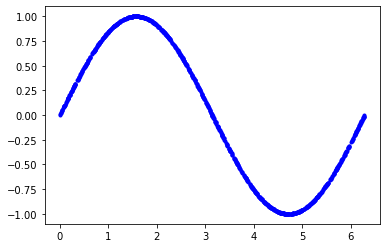

In [31]:
seed = 1337
np.random.seed(seed)
nsamples = 1000
tf.random.set_seed(seed)

x_values = np.random.uniform(low = 0, high = (2*math.pi), size = nsamples)
np.random.shuffle(x_values)
y_values = np.sin(x_values)
plt.plot(x_values, y_values, 'b.')

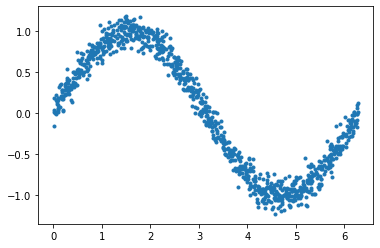

In [32]:
# Create noisy sinewave
y_values += (0.1*np.random.randn(y_values.shape[0]))
plt.plot(x_values, y_values, '.')

600
800


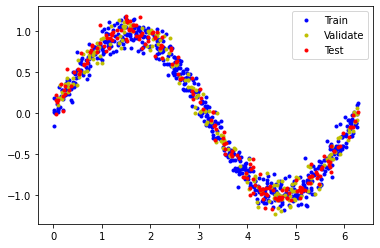

In [33]:
#split dataset into training, validation, and test sets
train_split = int(0.6 *nsamples)
test_split = int(train_split + 0.2*nsamples)
print (train_split)
print(test_split)

x_train, x_validate, x_test = np.split(x_values, [train_split, test_split])
y_train, y_validate, y_test = np.split(y_values, [train_split, test_split])

assert (x_train.size + x_validate.size + x_test.size) == nsamples

plt.plot(x_train, y_train, 'b.', label = 'Train')
plt.plot(x_validate, y_validate, 'y.', label = 'Validate')
plt.plot(x_test, y_test, 'r.', label = 'Test')
plt.legend()

In [36]:
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

model_1.add(layers.Dense(16, activation = 'relu', input_shape = (1,)))
model_1.add(layers.Dense(1))
model_1.compile(optimizer = 'rmsprop', loss = 'mse', metrics=['mae'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [38]:
history_1 = model_1.fit(x_train, y_train, epochs = 1000, batch_size = 16, validation_data = (x_validate,y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 5ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

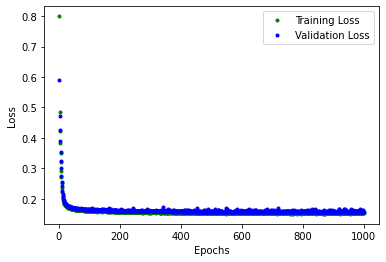

In [39]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'g.', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b.', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


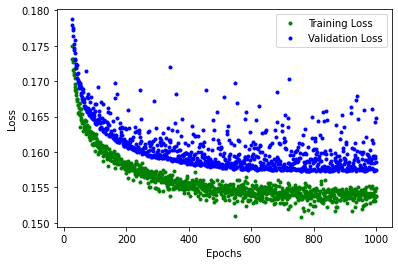

In [42]:
skip = 25
plt.plot(epochs[skip:], loss[skip:], 'g.', label = 'Training Loss')
plt.plot(epochs[skip:], val_loss[skip:], 'b.', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

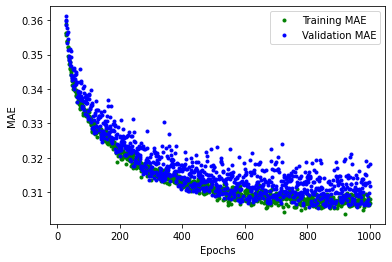

In [43]:
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[skip:], mae[skip:], 'g.', label = 'Training MAE')
plt.plot(epochs[skip:], val_mae[skip:], 'b.', label = 'Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

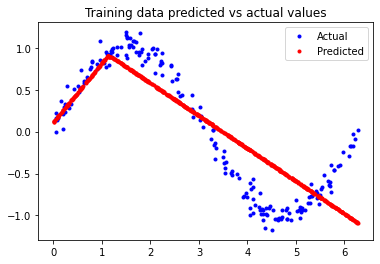

In [44]:
predictions = model_1.predict(x_train)
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_train, predictions, 'r.', label = 'Predicted')
plt.legend()

In [46]:
model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(16, activation = 'relu', input_shape=(1,)))
model_2.add(layers.Dense(16, activation = 'relu'))
model_2.add(layers.Dense(1))

model_2.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [47]:
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size = 16, validation_data = (x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 9ms/step - loss: 0.7137 - mae: 0.7311 - val_loss: 0.4662 - val_mae: 0.6012
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3890 - mae: 0.5420 - val_loss: 0.3745 - val_mae: 0.5205
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3183 - mae: 0.4884 - val_loss: 0.3078 - val_mae: 0.4784
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2622 - mae: 0.4452 - val_loss: 0.2525 - val_mae: 0.4323
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2180 - mae: 0.4095 - val_loss: 0.2074 - val_mae: 0.3926
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1853 - mae: 0.3783 - val_loss: 0.1887 - val_mae: 0.3702
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1667 - mae: 0.3572 - val_loss: 0.1682 - val_mae: 0.3546
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1532 - m

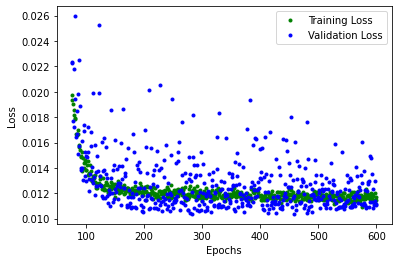

In [54]:
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

skip = 100
epochs = range(1, len(loss_2) + 1)
plt.clf()
plt.plot(epochs[skip:], loss_2[skip:], 'g.', label = 'Training Loss')
plt.plot(epochs[skip:], val_loss_2[skip:], 'b.', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

7/7 [==============================] - 0s 2ms/step - loss: 0.0090 - mae: 0.0743


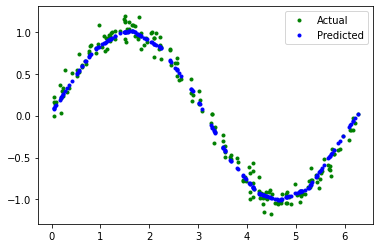

In [62]:
predicted_2 = model_2.predict(x_test)
loss = model_2.evaluate(x_test, y_test)

plt.plot(x_test, y_test, 'g.', label = 'Actual')
plt.plot(x_test, y_predicted_2, 'b.', label = 'Predicted')
plt.legend()

In [59]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open('sine_model.tflite', "wb").write(tflite_model)

#Convert the model to the tensorflow lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# define generator function that provides test data's x values as
# a representative dataset and tell converter to use it
def representative_dataset_generator():
  for value in x_test:
    yield [np.array(value, dtype = np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
tflite_model = converter.convert()

open('sine_model_quantized.tflite', "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbnusz749/assets
INFO:tensorflow:Assets written to: /tmp/tmpc3n5pjxb/assets


INFO:tensorflow:Assets written to: /tmp/tmpc3n5pjxb/assets


2696

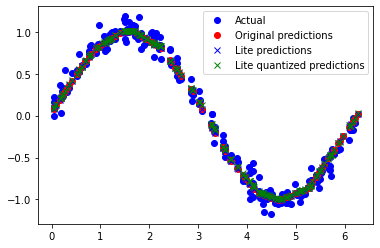

In [64]:
# Instantiate interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

#allocate memory
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

#get indexes of input and output tensors
sine_model_input_index = sine_model.get_input_details()[0]['index']
sine_model_output_index = sine_model.get_output_details()[0]['index']
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]['index']
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]['index']

#create arrays to store results
sine_model_predictions = []
sine_model_quantized_predictions = []

# run interpreter for each model's value
for x_value in x_test:
  # create 2D tensor
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype = np.float32)
  # write to input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # run inference
  sine_model.invoke()
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])

  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

plt.clf()
plt.plot(x_test, y_test, 'bo', label = 'Actual')
plt.plot(x_test, predicted_2, 'ro', label = 'Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label = 'Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label = 'Lite quantized predictions')
plt.legend()

In [72]:
import os
basic_model_size = os.path.getsize('sine_model.tflite')
print('Basic model is %s bytes' %basic_model_size)
quantized_model_size = os.path.getsize('sine_model_quantized.tflite')
print('Quantized model is %s bytes' %quantized_model_size)
difference = (1 - quantized_model_size/basic_model_size)*100
print ('Reduced by %d' %difference)

Basic model is 2892 bytes
Quantized model is 2696 bytes
Reduced by 6


In [74]:
!apt-get -qq install xxd
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
!cat sine_model_quantized.cc

Selecting previously unselected package xxd.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.4_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.4) ...
Setting up xxd (2:8.0.1453-1ubuntu1.4) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x14, 0x00, 0x20, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00,
  0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x1c, 0x00, 0x14, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x18, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00,
  0xb8, 0x00, 0x00, 0x00, 0x24, 0x00, 0x00, 0x00, 0x60, 0x00, 0x00, 0x00,
  0x58, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x98, 0x04, 0x00, 0x00,
  0xa4, 0x03, 0x00, 0x00, 0x68, 0x01, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0xb8, 0x00, 0x00, 0x00, 0x0e, 0x00, 0x00, 0x00, 0x28, 0x0a, 0x00, 0x00,
  0x24, 0x0a, 0x00, 0x00, 0x20, 0x09,